In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
ufodb = pd.read_csv("scrubbed.csv")

In [4]:
ufodb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [5]:
ufodb.dropna(inplace = True)

In [6]:
ufodb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  object 
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  object 
 10  longitude             66516 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


In [7]:
ufodb['country'].value_counts(normalize = True)

us    0.955454
ca    0.044230
gb    0.000165
au    0.000150
Name: country, dtype: float64

In [8]:
ufodb = ufodb[ufodb["country"] == "us"]
ufodb

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [12]:
def grep_year(x):
    x = x.split(" ")[0]
    x = x.split("/")[2]
    x = int(x)
    return x

ufodb["sightYear"] = ufodb["datetime"].apply(grep_year)
ufodb["reportYear"] = ufodb["date posted"].apply(grep_year)
ufodb.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,2004
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,2004
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961,2007
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965,1999


In [13]:
states_us = ufodb[ufodb.country == "us"]["state"].value_counts().index
states_us = [i.upper() for i in states_us]
states_us

['CA',
 'FL',
 'WA',
 'TX',
 'NY',
 'IL',
 'AZ',
 'PA',
 'OH',
 'MI',
 'NC',
 'OR',
 'MO',
 'CO',
 'IN',
 'VA',
 'MA',
 'NJ',
 'GA',
 'WI',
 'TN',
 'MN',
 'SC',
 'CT',
 'KY',
 'MD',
 'NV',
 'OK',
 'NM',
 'IA',
 'AL',
 'UT',
 'KS',
 'AR',
 'LA',
 'ME',
 'ID',
 'NH',
 'MT',
 'WV',
 'NE',
 'MS',
 'AK',
 'HI',
 'VT',
 'RI',
 'SD',
 'WY',
 'DE',
 'ND',
 'PR',
 'DC']

In [14]:
states_ratio = ufodb[ufodb.country == "us"]["state"].value_counts().values
states_ratio

array([8683, 3754, 3707, 3398, 2915, 2447, 2362, 2319, 2251, 1781, 1722,
       1667, 1431, 1385, 1268, 1248, 1238, 1236, 1235, 1205, 1091,  996,
        986,  865,  843,  818,  778,  714,  693,  669,  629,  611,  599,
        578,  547,  544,  508,  482,  460,  438,  373,  368,  311,  257,
        254,  224,  177,  169,  165,  123,   24,    7])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



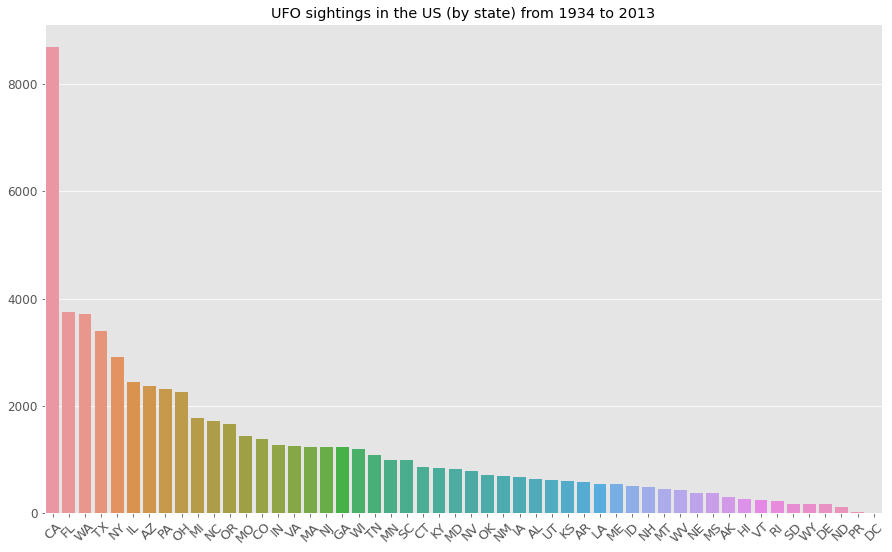

In [312]:
plt.subplots(figsize=(15,9))
sns.barplot(states_us, states_ratio)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=12)
plt.title('UFO sightings in the US (by state) from 1934 to 2013')
plt.show();

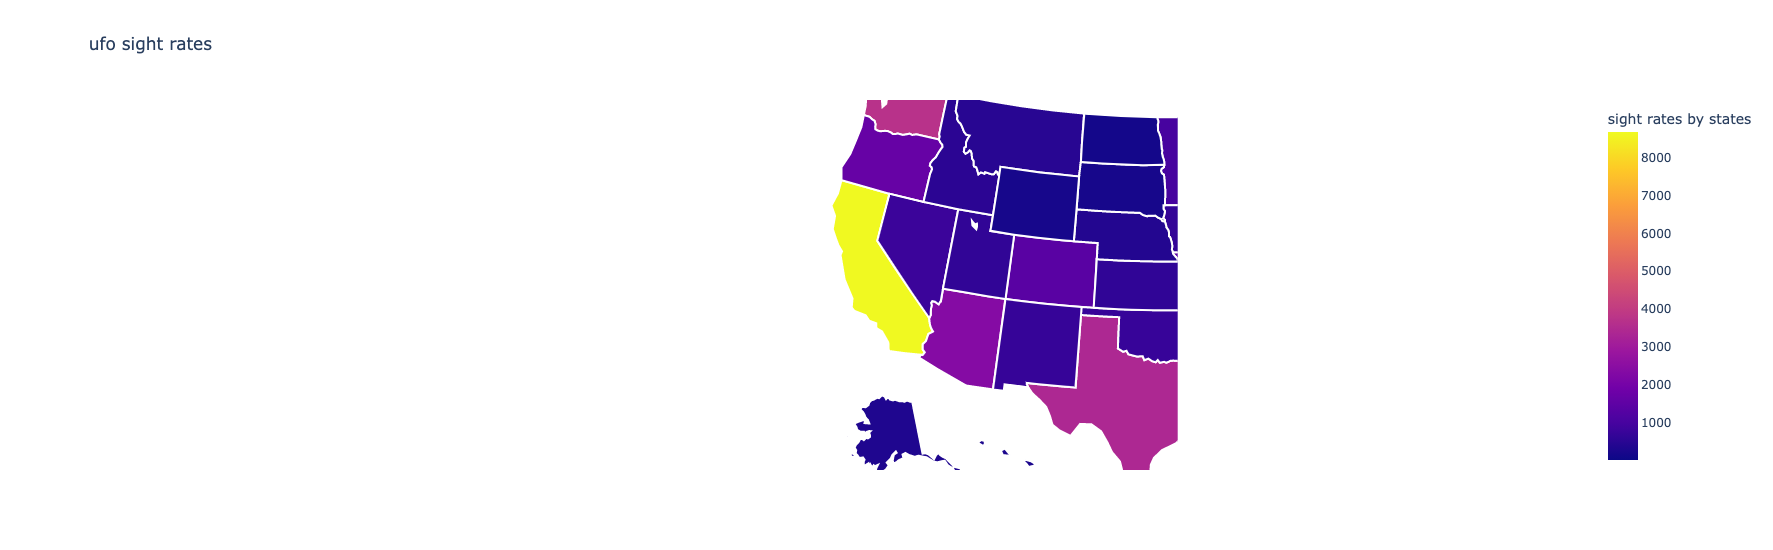

In [311]:
data = [
    dict(
    type="choropleth",
    locations = states_us,
    z = states_ratio,
    locationmode = "USA-states",
    text = "times",
    marker = dict(
        line = dict(
            color = "rgb(255,255,255)",
            width = 2
        )),
    colorbar = dict(
    title = "sight rates by states")
    )
]

layout = dict(
    title = "ufo sight rates",
    geo = dict(
        scope = "usa",
        projection = dict( type = "albers usa" ),
        showlakes = True,
        lakecolor = "rgb(255,255,255)"),

)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,
        image_width = 1200,
        image_height = 1200)

In [17]:
ufodb.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,2004
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,2004
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961,2007
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965,1999


In [18]:
ufodb['comments']

0        This event took place in early fall around 194...
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
5        My father is now 89 my brother 52 the girl wit...
7        A bright orange color changing to reddish colo...
                               ...                        
80327    Round from the distance/slowly changing colors...
80328    Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80329                                         Napa UFO&#44
80330    Saw a five gold lit cicular craft moving fastl...
80331    2 witnesses 2  miles apart&#44 Red &amp; White...
Name: comments, Length: 63553, dtype: object

In [20]:
ufodb['sightYear'].value_counts().sort_values()

1934       1
1941       1
1929       1
1925       1
1920       1
        ... 
2009    3612
2008    3971
2011    4332
2013    5991
2012    6253
Name: sightYear, Length: 83, dtype: int64

In [49]:
# Creating a dataset where we look at just UFO sightings from 2000 and on.

ufo2k = ufodb[ufodb['sightYear'].isin(range(2000,2014))]

In [50]:
ufo2k.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
93,10/10/2000 03:00,perryville,mo,us,oval,180,3 minutes,The craft was big&#44 orange&#44 and oval shaped.,12/2/2000,37.7241667,-89.861111,2000,2000
94,10/10/2000 06:15,boynton beach,fl,us,other,10,10 seconds,Unusual light formation moving extremely fast ...,12/2/2000,26.5250000,-80.066667,2000,2000
98,10/10/2000 20:30,brinktown,mo,us,light,1800,30 min.,3 bright golden lights moving independently ab...,12/2/2000,38.1266667,-92.084444,2000,2000
99,10/10/2000 21:30,florence,ky,us,light,5,4-5 seconds,Two objects traveling side by side pass over&#...,12/2/2000,38.9988889,-84.626667,2000,2000
100,10/10/2000 21:30,seattle (west),wa,us,unknown,10,10 sec,Dark object in the shape of a (4) after dusk i...,2/11/2003,47.6063889,-122.330833,2000,2003


In [51]:
ufo2k.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013,2013
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013,2013
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013,2013
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013,2013
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778,2013,2013


In [52]:
ufo2k.reset_index(drop=True)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
0,10/10/2000 03:00,perryville,mo,us,oval,180,3 minutes,The craft was big&#44 orange&#44 and oval shaped.,12/2/2000,37.7241667,-89.861111,2000,2000
1,10/10/2000 06:15,boynton beach,fl,us,other,10,10 seconds,Unusual light formation moving extremely fast ...,12/2/2000,26.5250000,-80.066667,2000,2000
2,10/10/2000 20:30,brinktown,mo,us,light,1800,30 min.,3 bright golden lights moving independently ab...,12/2/2000,38.1266667,-92.084444,2000,2000
3,10/10/2000 21:30,florence,ky,us,light,5,4-5 seconds,Two objects traveling side by side pass over&#...,12/2/2000,38.9988889,-84.626667,2000,2000
4,10/10/2000 21:30,seattle (west),wa,us,unknown,10,10 sec,Dark object in the shape of a (4) after dusk i...,2/11/2003,47.6063889,-122.330833,2000,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50236,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013,2013
50237,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013,2013
50238,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013,2013
50239,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013,2013


In [53]:
ufo2k.shape

(50241, 13)

In [54]:
# Quick check to see how long our comments are:

ufo2k['tokenized data'] = [i for i in ufo2k['comments'].str.split()]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
ufo2k

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear,tokenized data
93,10/10/2000 03:00,perryville,mo,us,oval,180,3 minutes,The craft was big&#44 orange&#44 and oval shaped.,12/2/2000,37.7241667,-89.861111,2000,2000,"[The, craft, was, big&#44, orange&#44, and, ov..."
94,10/10/2000 06:15,boynton beach,fl,us,other,10,10 seconds,Unusual light formation moving extremely fast ...,12/2/2000,26.5250000,-80.066667,2000,2000,"[Unusual, light, formation, moving, extremely,..."
98,10/10/2000 20:30,brinktown,mo,us,light,1800,30 min.,3 bright golden lights moving independently ab...,12/2/2000,38.1266667,-92.084444,2000,2000,"[3, bright, golden, lights, moving, independen..."
99,10/10/2000 21:30,florence,ky,us,light,5,4-5 seconds,Two objects traveling side by side pass over&#...,12/2/2000,38.9988889,-84.626667,2000,2000,"[Two, objects, traveling, side, by, side, pass..."
100,10/10/2000 21:30,seattle (west),wa,us,unknown,10,10 sec,Dark object in the shape of a (4) after dusk i...,2/11/2003,47.6063889,-122.330833,2000,2003,"[Dark, object, in, the, shape, of, a, (4), aft..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013,2013,"[Round, from, the, distance/slowly, changing, ..."
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013,2013,"[Boise&#44, ID&#44, spherical&#44, 20, min&#44..."
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013,2013,"[Napa, UFO&#44]"
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013,2013,"[Saw, a, five, gold, lit, cicular, craft, movi..."


In [57]:
comment_length = [len(tokens) for tokens in ufo2k['tokenized data']]

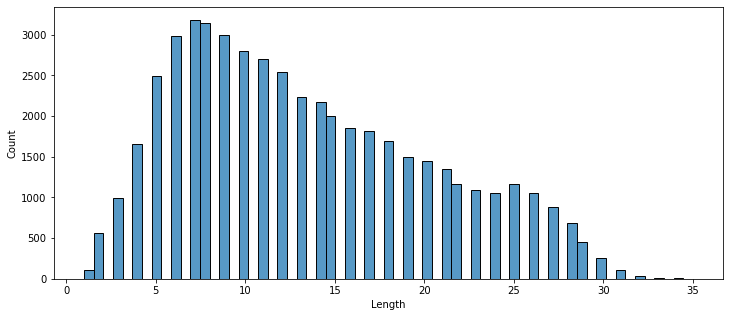

In [58]:
# Checking distribution!

plt.figure(figsize = (12, 5))
sns.histplot(comment_length)
plt.xlabel('Length')
plt.ylabel('Count');

In [59]:
# I wonder if there's any possiblity we can predict when the comment was made just by the length of the comment...? Or the words within the comments? 

X = ufo2k['comments']
y = ufo2k['sightYear']

In [60]:
# Normalize the dataset / stratify because this is a classification model.

y.value_counts(normalize = True)

2012    0.124460
2013    0.119245
2011    0.086224
2008    0.079039
2009    0.071893
2010    0.069804
2007    0.068569
2004    0.063733
2005    0.063534
2003    0.058040
2006    0.056906
2001    0.048029
2002    0.047750
2000    0.042774
Name: sightYear, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [112]:
vect = CountVectorizer(lowercase = True, stop_words = 'english')

In [113]:
X_train_cv = vect.fit_transform(X_train)

In [114]:
X_test_cv = vect.transform(X_test)

In [115]:
X_train_cv

<37680x16986 sparse matrix of type '<class 'numpy.int64'>'
	with 328134 stored elements in Compressed Sparse Row format>

In [116]:
X_train_cv.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
# Now that we've converted into a numpy array, let us use Multinomial Bayes to see if we can predict the year.

nb = MultinomialNB()

In [118]:
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [119]:
# Now we evaluate: 

nb.score(X_test_cv, y_test)

0.1729161690948173

In [120]:
nb.score(X_train_cv, y_train)

0.3742569002123142

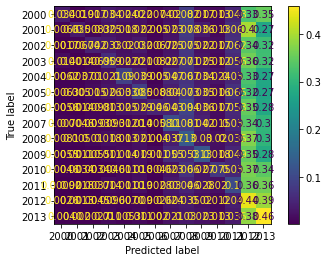

In [121]:
# Checking confusion matrix: 

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, 
                      X_test_cv,
                      y_test,
                      normalize = 'true');

In [122]:
y_train.value_counts(normalize = True)

2012    0.124469
2013    0.119241
2011    0.086226
2008    0.079034
2009    0.071895
2010    0.069798
2007    0.068577
2004    0.063721
2005    0.063535
2003    0.058041
2006    0.056900
2001    0.048036
2002    0.047744
2000    0.042781
Name: sightYear, dtype: float64

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config

In [127]:
pipe = make_pipeline(CountVectorizer(lowercase = True, stop_words = 'english'), LogisticRegression(max_iter = 10_000))
set_config(display = 'diagram')

In [128]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [129]:
pipe.score(X_test, y_test)

0.17737441286521774

In [130]:
pipe.score(X_train, y_train)

0.5371284501061571

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [144]:
# It is overfitting by quite a lot. Logistic Regression is not the way to go. What about Decision Tree? 

pipe_d = make_pipeline(CountVectorizer(stop_words = 'english'), DecisionTreeClassifier())

In [145]:
pipe_d.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer(stop_words='english')),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'countvectorizer': CountVectorizer(stop_words='english'),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': 'english',
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decision

In [146]:
params = {
          'decisiontreeclassifier__max_depth': range(2, 6),
          'decisiontreeclassifier__min_samples_leaf': [2, 3, 4]
         } 

In [147]:
gs = GridSearchCV(estimator = pipe_d, param_grid = params, n_jobs = -1)

In [148]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(2, 6),
                         'decisiontreeclassifier__min_samples_leaf': [2, 3, 4]})

In [149]:
gs.score(X_test, y_test)

0.13382692460791337

In [150]:
from sklearn.metrics import balanced_accuracy_score

In [151]:
balanced_accuracy_score(y_test, gs.predict(X_test))

0.08002234678214885

In [153]:
from sklearn.tree import plot_tree

In [155]:
X_train

58316    Single bright white light observed in eastern ...
60826                    Unusual lights in Sanford Florida
63285              5 orange oval shape objects in the sky.
41480    7 red glowing forms travelling north in format...
16770    Flashing light object that flew low to the gro...
                               ...                        
43702    5 objects travelling at high speed and fliying...
22069                   Bright light over Tehachapi&#44 Ca
29950    Bright white light in the sky.  Spring Hill TN...
64703    UFO sighting over Ocean Beach&#44 CA on 11 AUG...
11342                   Odessa tx flying object new years.
Name: comments, Length: 37680, dtype: object

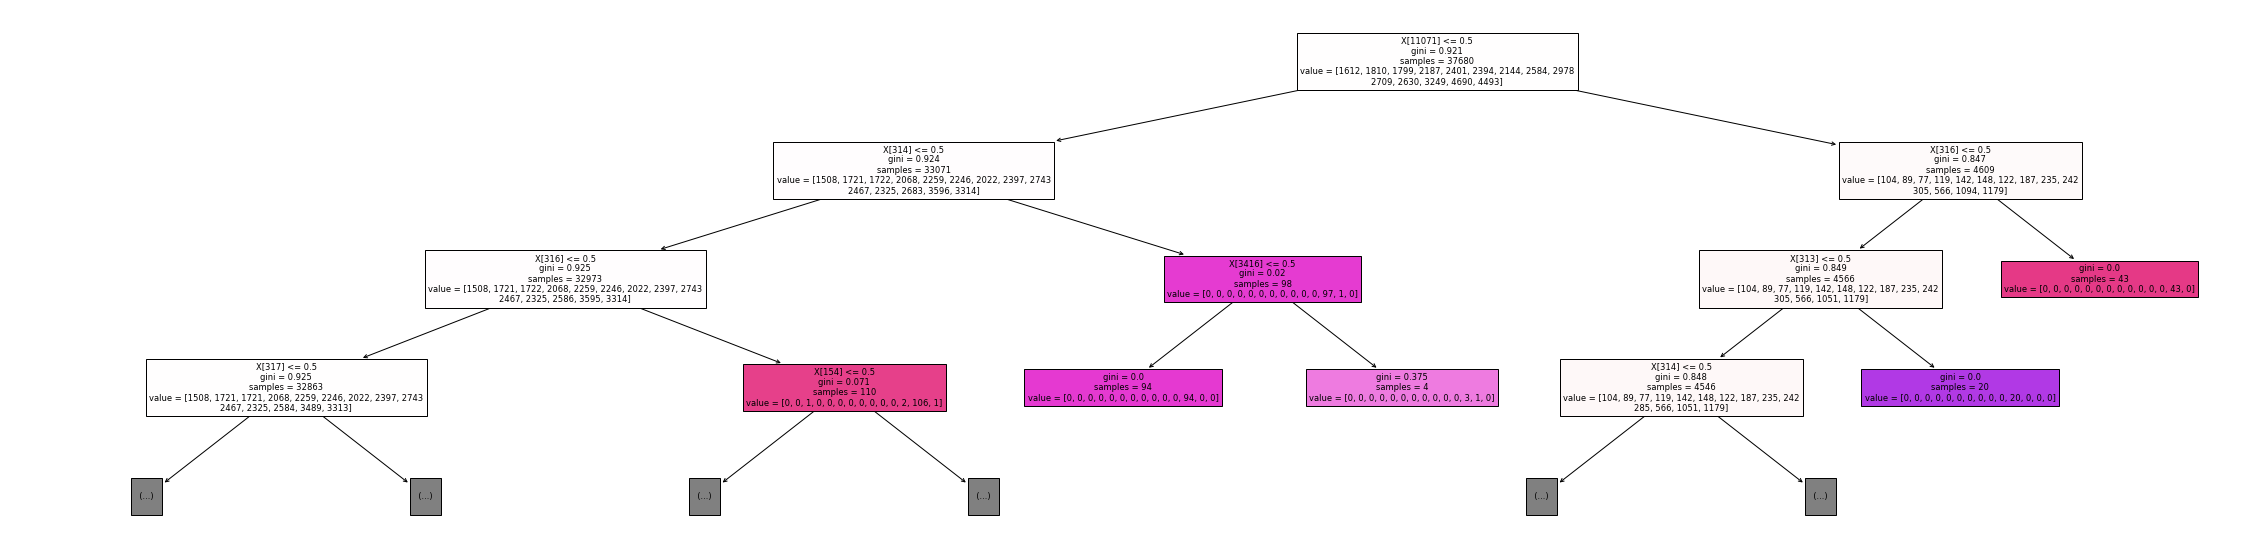

In [159]:
plt.figure(figsize=(40, 10))
plot_tree(gs.best_estimator_.named_steps['decisiontreeclassifier'], filled = True, max_depth = 3);

In [160]:
# Looking at most often used words

import nltk

In [169]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/KOH/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [162]:
ufo2k.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear,tokenized data
93,10/10/2000 03:00,perryville,mo,us,oval,180,3 minutes,The craft was big&#44 orange&#44 and oval shaped.,12/2/2000,37.7241667,-89.861111,2000,2000,"[The, craft, was, big&#44, orange&#44, and, ov..."
94,10/10/2000 06:15,boynton beach,fl,us,other,10,10 seconds,Unusual light formation moving extremely fast ...,12/2/2000,26.5250000,-80.066667,2000,2000,"[Unusual, light, formation, moving, extremely,..."
98,10/10/2000 20:30,brinktown,mo,us,light,1800,30 min.,3 bright golden lights moving independently ab...,12/2/2000,38.1266667,-92.084444,2000,2000,"[3, bright, golden, lights, moving, independen..."


In [175]:
from collections import Counter

top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (ufo2k['comments']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

        Frequency
Word             
light       10223
lights      10137
object       8468
bright       8318
sky          7619
moving       5803
orange       4899
white        4603
red          4214
saw          3673


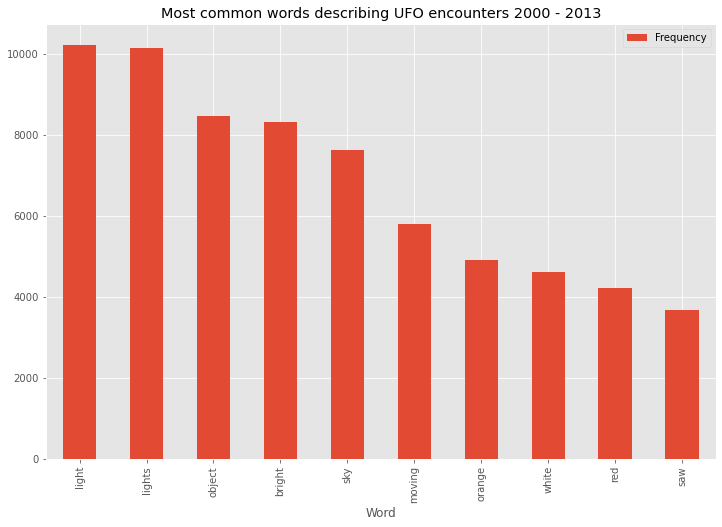

In [186]:
rslt.plot(kind = 'bar',
         figsize = (12,8),
         title='Most common words describing UFO encounters 2000 - 2013');

In [256]:
# What about in California...? 

ufo_ca_2k = ufodb[(ufodb['state'] == 'ca') & (ufodb['sightYear'].isin(range(2000,2014)))]

In [257]:
ufo_ca_2k.reset_index(drop=True)
ufo_ca_2k

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
105,10/10/2001 20:35,hayward,ca,us,circle,120,2/min.,FALLING STAR STOPS &#39SHOTS OUT DOZENS OF ...,11/20/2001,37.6688889,-122.079722,2001,2001
107,10/10/2001 21:30,fresno,ca,us,changing,900,15 min. apprx,Objects were sighted driving north on Highway ...,11/20/2001,36.7477778,-119.771389,2001,2001
118,10/10/2003 12:00,alhambra,ca,us,oval,300,5 min,3 Black ovals in the sky and a floating movie ...,1/17/2004,34.0952778,-118.126111,2003,2004
134,10/10/2004 15:00,berkeley,ca,us,unknown,180,3 minutes,While driving my car in the mid afternoon of a...,5/24/2005,37.8716667,-122.271667,2004,2005
146,10/10/2005 14:45,los angeles,ca,us,egg,10,10 seconds,Egg UFO over Hollywood Hills and LAX in LOS AN...,10/20/2005,34.0522222,-118.242778,2005,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,9/9/2012 20:00,arcata,ca,us,formation,600.0,10 minutes,Object with red and green lights moving sited ...,9/24/2012,40.866667,-124.081667,2012,2012
80305,9/9/2012 20:30,ventura,ca,us,chevron,900.0,15 minutes,Beautiful bright blue delta shaped aerobatics.,9/24/2012,34.278333,-119.292222,2012,2012
80310,9/9/2012 21:00,ventura,ca,us,circle,300.0,5 minutes,Bright Blue Object seen floating in sky near C...,9/24/2012,34.278333,-119.292222,2012,2012
80316,9/9/2013 09:51,san diego,ca,us,light,4.0,~4 seconds,2 white lights zig-zag over Qualcomm Stadium (...,9/30/2013,32.715278,-117.156389,2013,2013


In [258]:
stopwords = nltk.corpus.stopwords.words('english')

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# replace '|'-->' ' and drop all stopwords
words = (ufo_ca_2k['comments']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt_ca = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt_ca)

        Frequency
Word             
light        1481
object       1291
lights       1285
bright       1178
sky          1043
moving        763
red           648
white         639
orange        630
seen          510


In [259]:
# Okay, I think shape might be more interesting? 

ufo_ca_2k['shape'].value_counts(normalize = True)

light        0.221887
circle       0.100374
triangle     0.095628
fireball     0.081680
sphere       0.070175
other        0.067156
unknown      0.064999
disk         0.060253
oval         0.044722
formation    0.034656
changing     0.032499
cigar        0.019701
flash        0.017688
rectangle    0.016681
chevron      0.016681
diamond      0.015531
cylinder     0.014380
egg          0.009635
teardrop     0.008341
cross        0.003739
cone         0.003595
Name: shape, dtype: float64

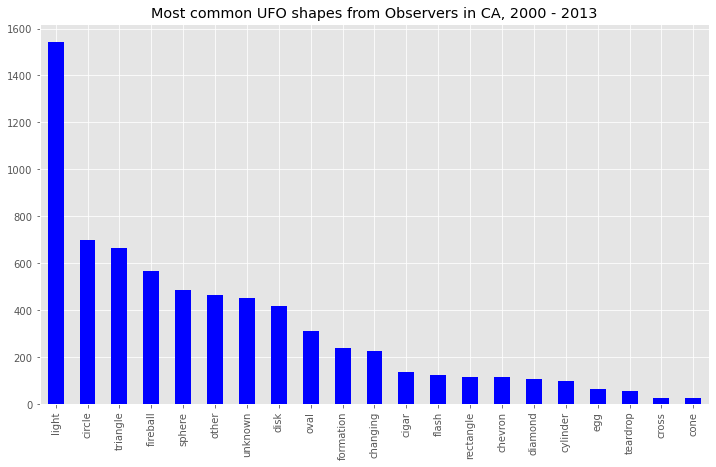

In [260]:
ufo_ca_2k['shape'].value_counts().plot(kind = 'bar',
                                      figsize = (12,7),
                                      title = 'Most common UFO shapes from Observers in CA, 2000 - 2013',
                                      color = 'blue');

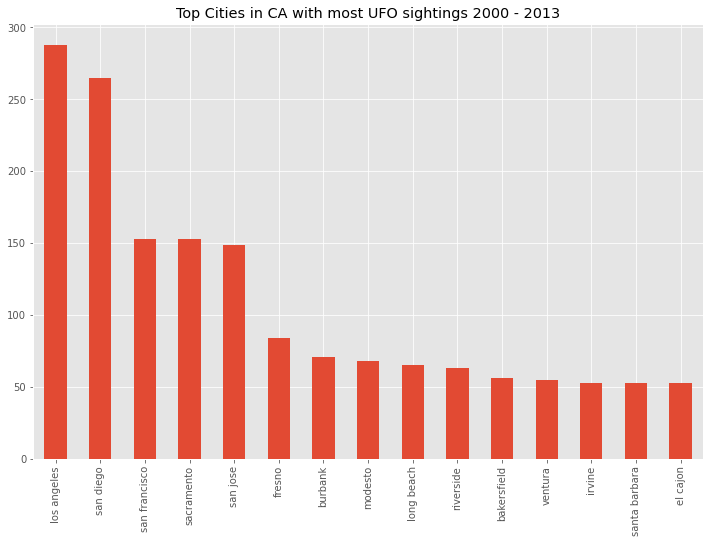

In [261]:
# What about cities in CA? Which cities had the most UFO sightings between 2000 and 2013?

ufo_ca_2k['city'].value_counts()[0:15].plot(kind = 'bar', 
                                           figsize = (12,8),
                                           title = 'Top Cities in CA with most UFO sightings 2000 - 2013');

In [366]:
# LA has the highest pop density, so it may be because of that we have highest sightings. What happens if we look at sightings per pop? 
# We should look at a single year so that population makes sense -- grabbing census data for these cities.

CA_2010_pop = pd.DataFrame(columns = ['population'])

In [367]:
ufo_ca_2010 = ufo_ca_2k[ufo_ca_2k['sightYear'] == 2010]

In [368]:
CA_2010_pop['count'] = ufo_ca_2013['city'].value_counts()[0:15].sort_values(ascending = True)

In [370]:
CA_2010_pop

,population,count
escondido,NaN,5
orange,NaN,5
lake elsinore,NaN,5
bakersfield,NaN,5
redding,NaN,5
riverside,NaN,5
long beach,NaN,6
oakland,NaN,6
thousand oaks,NaN,6
sacramento,NaN,8


In [371]:
CA_2010_pop.reset_index(inplace = True)

In [372]:
CA_2010_pop.rename(columns = {'index':'name'}, inplace=True)

In [373]:
ca_city = pd.read_csv('california_city.csv',thousands = ',')

In [374]:
ca_city.columns = ca_city.columns.str.lower().str.strip()

In [375]:
ca_city['name'] = ca_city['name'].str.lower()

In [376]:
ca_city.head()

,name,type,county,pop_2020,pop_2010
0,adelanto,City,San Bernardino,38046,31765
1,agoura hills,City,Los Angeles,20299,20330
2,alameda,City,Alameda,78280,73812
3,albany,City,Alameda,20271,18539
4,alhambra,City,Los Angeles,82868,83089


In [377]:
merged_ufo_ca = pd.merge(CA_2010_pop, ca_city, how = 'inner', on='name')

In [378]:
merged_ufo_ca.drop(columns='population',inplace=True)
merged_ufo_ca

,name,count,type,county,pop_2020,pop_2010
0,escondido,5,City,San Diego,151038,143911
1,orange,5,City,Orange,139911,134616
2,lake elsinore,5,City,Riverside,70265,51821
3,bakersfield,5,City,Kern,403455,347483
4,redding,5,City,Shasta,93611,89861
5,riverside,5,City,Riverside,314998,303871
6,long beach,6,City,Los Angeles,466742,462257
7,oakland,6,City,Alameda,440646,390724
8,thousand oaks,6,City,Ventura,126966,126683
9,sacramento,8,City,Sacramento,524943,466488


In [379]:
merged_ufo_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      15 non-null     object
 1   count     15 non-null     int64 
 2   type      15 non-null     object
 3   county    15 non-null     object
 4   pop_2020  15 non-null     int64 
 5   pop_2010  15 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 840.0+ bytes


In [380]:
merged_ufo_ca['sightings per pop'] = merged_ufo_ca['count']/merged_ufo_ca['pop_2010']

In [382]:
merged_ufo_ca['% of pop'] = merged_ufo_ca['sightings per pop'] * 100

In [383]:
merged_ufo_ca.sort_values(by = 'sightings per pop', ascending = False)

,name,count,type,county,pop_2020,pop_2010,sightings per pop,% of pop
2,lake elsinore,5,City,Riverside,70265,51821,0.000096,0.009649
4,redding,5,City,Shasta,93611,89861,0.000056,0.005564
8,thousand oaks,6,City,Ventura,126966,126683,0.000047,0.004736
10,modesto,9,City,Stanislaus,218464,201165,0.000045,0.004474
1,orange,5,City,Orange,139911,134616,0.000037,0.003714
0,escondido,5,City,San Diego,151038,143911,0.000035,0.003474
9,sacramento,8,City,Sacramento,524943,466488,0.000017,0.001715
5,riverside,5,City,Riverside,314998,303871,0.000016,0.001645
7,oakland,6,City,Alameda,440646,390724,0.000015,0.001536
3,bakersfield,5,City,Kern,403455,347483,0.000014,0.001439


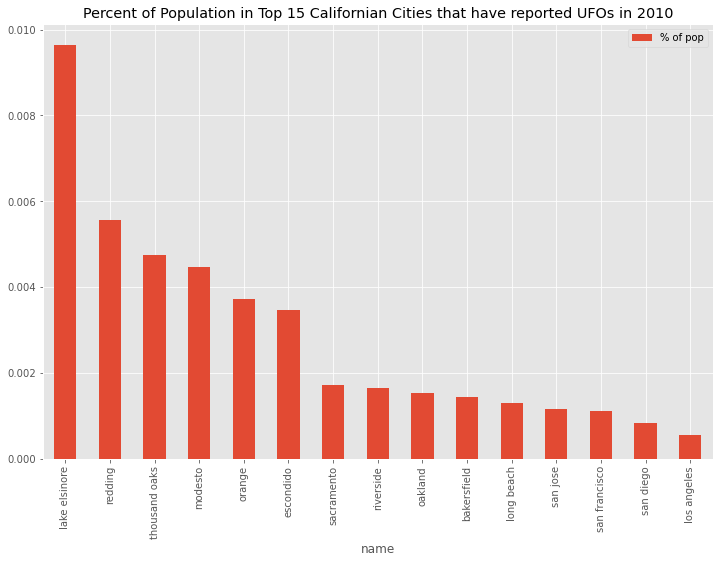

In [444]:
merged_ufo_ca.sort_values(by = '% of pop', ascending = False).plot(x = 'name',
                                                                   y = '% of pop',
                                                                   kind = 'bar',
                                                                   figsize = (12,8),
                                                                   title = 'Percent of Population in Top 15 Californian Cities that have reported UFOs in 2010');

In [411]:
# Did CA see a growth of sightings over the years? 

ufodb_ca = ufodb[ufodb['state'] == 'ca']

In [417]:
ufodb_ca['datetime'].str.split()

10       [10/10/1968, 13:00]
30       [10/10/1979, 22:00]
45       [10/10/1989, 00:00]
72       [10/10/1998, 02:30]
82       [10/10/1999, 00:01]
                ...         
80299      [9/9/2012, 20:00]
80305      [9/9/2012, 20:30]
80310      [9/9/2012, 21:00]
80316      [9/9/2013, 09:51]
80329      [9/9/2013, 22:00]
Name: datetime, Length: 8683, dtype: object

10       10/10/1968 13:00
30       10/10/1979 22:00
45       10/10/1989 00:00
72       10/10/1998 02:30
82       10/10/1999 00:01
               ...       
80299      9/9/2012 20:00
80305      9/9/2012 20:30
80310      9/9/2012 21:00
80316      9/9/2013 09:51
80329      9/9/2013 22:00
Name: datetime, Length: 8683, dtype: object

In [408]:
ufodb_ca = ufodb_ca[ufodb_ca['datetime'].str.contains('10/12/2013 24:00')==False]

In [425]:
ufodb_ca['datetime'].filter(like='24:00')

Series([], Name: datetime, dtype: datetime64[ns])

In [409]:
ufodb_ca.reset_index(drop = True, inplace=True)

In [422]:
ufodb_ca['datetime'] = pd.to_datetime(ufodb_ca['datetime'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [426]:
ufodb_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8683 entries, 10 to 80329
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              8620 non-null   datetime64[ns]
 1   city                  8683 non-null   object        
 2   state                 8683 non-null   object        
 3   country               8683 non-null   object        
 4   shape                 8683 non-null   object        
 5   duration (seconds)    8683 non-null   object        
 6   duration (hours/min)  8683 non-null   object        
 7   comments              8683 non-null   object        
 8   date posted           8683 non-null   object        
 9   latitude              8683 non-null   object        
 10  longitude             8683 non-null   float64       
 11  sightYear             8683 non-null   int64         
 12  reportYear            8683 non-null   int64         
dtypes: datetime64[ns

In [427]:
ufodb_ca.sort_values(by = 'datetime', inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [430]:
ufodb_ca = ufodb_ca[pd.notnull(ufodb_ca['datetime'])]

In [431]:
ufodb_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 66131 to 46151
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              8620 non-null   datetime64[ns]
 1   city                  8620 non-null   object        
 2   state                 8620 non-null   object        
 3   country               8620 non-null   object        
 4   shape                 8620 non-null   object        
 5   duration (seconds)    8620 non-null   object        
 6   duration (hours/min)  8620 non-null   object        
 7   comments              8620 non-null   object        
 8   date posted           8620 non-null   object        
 9   latitude              8620 non-null   object        
 10  longitude             8620 non-null   float64       
 11  sightYear             8620 non-null   int64         
 12  reportYear            8620 non-null   int64         
dtypes: datetime64

In [433]:
ufodb_ca.set_index('datetime', inplace = True)

In [434]:
ufodb_ca.head()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightYear,reportYear
datetime,,,,,,,,,,,,
1937-08-15 21:00:00,fontana,ca,us,light,600.0,5 to 10 min,A cylinder light came on above us with no sound .,2/22/2002,34.092222,-117.434167,1937,2002
1944-01-01 12:00:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389,1944,2004
1945-08-08 12:00:00,huntington beach,ca,us,disk,300.0,5 minutes,MY DAD SAYS HIS AUNT AND UNCLE SAW THIS CRAFT ...,1/17/2004,33.660278,-117.998333,1945,2004
1946-02-01 17:00:00,merced,ca,us,sphere,10,10 seconds,Three luminescent chartreusse spheres moving &...,10/11/2005,37.3022222,-120.481944,1946,2005
1946-06-30 19:00:00,blairsden,ca,us,sphere,10,10 seconds,Looked up and saw sphere or disk 30-50 feet in...,1/21/2008,39.7811111,-120.615556,1946,2008


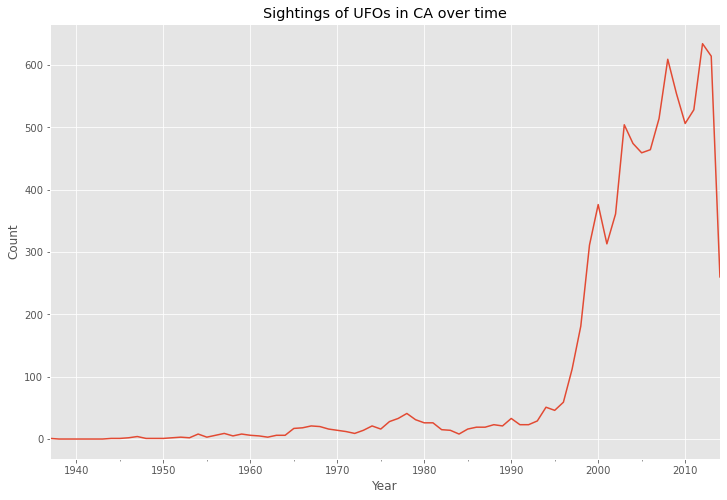

In [442]:
ufodb_ca['city'].resample('Y').count().plot(figsize = (12,8),
                                           title='Sightings of UFOs in CA over time',
                                           xlabel='Year',
                                           ylabel='Count');

In [206]:
ufodb['sightYear'].value_counts().sort_values()

1934       1
1941       1
1929       1
1925       1
1920       1
        ... 
2009    3612
2008    3971
2011    4332
2013    5991
2012    6253
Name: sightYear, Length: 83, dtype: int64

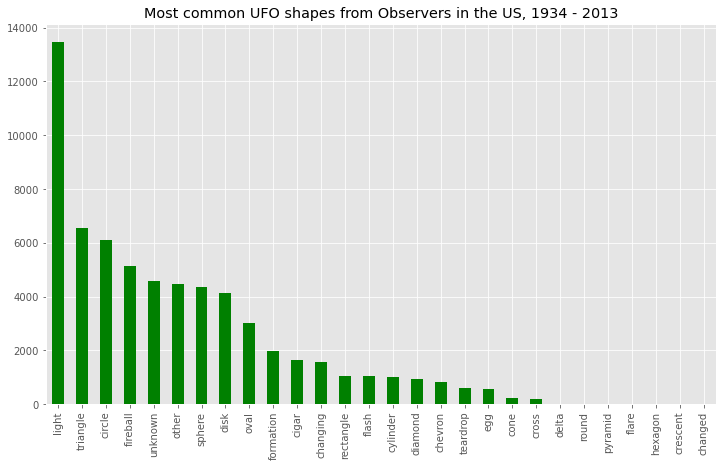

In [207]:
ufodb['shape'].value_counts().plot(kind = 'bar',
                                      figsize = (12,7),
                                      title = 'Most common UFO shapes from Observers in the US, 1934 - 2013',
                                      color = 'green');